In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, confusion_matrix, PrecisionRecallDisplay
from kmodes.kmodes import KModes

In [110]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [111]:
df = pd.read_excel(r"AI-Human-PewData.xlsx")
df

,Unnamed: 0,QKEY,INTERVIEW_START_W99,INTERVIEW_END_W99,DEVICE_TYPE_W99,LANG_W99,FORM_W99,XTABLET_W99,TECH1_W99,SC1_W99,...,F_PARTYLN_FINAL,F_PARTYSUM_FINAL,F_PARTYSUMIDEO_FINAL,F_INC_SDT1,F_REG,F_IDEO,F_INTFREQ,F_VOLSUM,F_INC_TIER2,WEIGHT_W99
0,0,100260,2021-11-03 14:25:27,2021-11-03 14:45:34,Laptop/PC,English,Form 2,Non-tablet HH,NaN,Mostly positive,...,NaN,Rep/Lean Rep,Conservative Rep/Lean,"$50,000 to less than $60,000",You are ABSOLUTELY CERTAIN that you are regist...,Very conservative,Several times a day,No,Middle income,0.206396
1,1,100314,2021-11-04 12:35:35,2021-11-04 12:55:29,Smartphone,English,Form 1,Non-tablet HH,Mostly positive,NaN,...,NaN,Rep/Lean Rep,Moderate/Liberal Rep/Lean,"$40,000 to less than $50,000",You are ABSOLUTELY CERTAIN that you are regist...,Liberal,Several times a day,Yes,Middle income,0.315090
2,2,100363,2021-11-03 20:23:43,2021-11-03 20:36:24,Smartphone,English,Form 1,Non-tablet HH,Mostly positive,NaN,...,NaN,Dem/Lean Dem,Moderate/Conservative Dem/Lean,"$100,000 or more",You are ABSOLUTELY CERTAIN that you are regist...,Moderate,Several times a day,No,Upper income,0.829579
3,3,100598,2021-11-02 13:01:05,2021-11-04 12:37:42,Laptop/PC,English,Form 2,Non-tablet HH,NaN,Mostly positive,...,NaN,Rep/Lean Rep,Conservative Rep/Lean,"$100,000 or more",You are ABSOLUTELY CERTAIN that you are regist...,Conservative,Several times a day,Yes,Upper income,0.337527
4,4,100637,2021-11-02 12:32:58,2021-11-02 12:46:23,Laptop/PC,English,Form 2,Non-tablet HH,NaN,Equal positive and negative effects,...,The Republican Party,Rep/Lean Rep,Conservative Rep/Lean,"$30,000 to less than $40,000",You are ABSOLUTELY CERTAIN that you are regist...,Very conservative,Less often,No,Lower income,1.210606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10255,10255,202101013246,2021-11-02 15:06:47,2021-11-02 15:21:18,Smartphone,English,Form 2,Non-tablet HH,NaN,Mostly positive,...,The Republican Party,Rep/Lean Rep,Moderate/Liberal Rep/Lean,"Less than $30,000",You are NOT registered to vote at your current...,Moderate,Almost constantly,No,Lower income,0.425901
10256,10256,202101013292,2021-11-02 12:18:58,2021-11-02 12:32:49,Smartphone,English,Form 2,Non-tablet HH,NaN,Mostly positive,...,NaN,Dem/Lean Dem,Liberal Dem/Lean,"$100,000 or more",You are ABSOLUTELY CERTAIN that you are regist...,Liberal,Several times a day,Yes,Upper income,0.157638
10257,10257,202101013344,2021-11-04 16:30:29,2021-11-06 11:08:56,Smartphone,English,Form 1,Non-tablet HH,Mostly positive,NaN,...,The Democratic Party,Dem/Lean Dem,Liberal Dem/Lean,"Less than $30,000",You are ABSOLUTELY CERTAIN that you are regist...,Liberal,Almost constantly,Yes,Lower income,0.282079
10258,10258,202101013446,2021-11-06 15:22:13,2021-11-06 16:10:36,Laptop/PC,English,Form 1,Non-tablet HH,Mostly positive,NaN,...,NaN,Rep/Lean Rep,Moderate/Liberal Rep/Lean,"$40,000 to less than $50,000",You are ABSOLUTELY CERTAIN that you are regist...,Moderate,Several times a day,No,Middle income,0.441525


# Three main factors we are looking at: Region, Education, Political 

## Facial recognition 

#### create a new dataframe with the columns related

In [112]:
# take out the columns that are related to the facial recognition 
face_columns = [col for col in df.columns if 'FACE' in col]


In [113]:
face_df = df[face_columns].copy()

In [114]:
face_df

,FACEREC1_W99,FACEREC2_W99,FACEREC3_a_W99,FACEREC3_b_W99,FACEREC3_c_W99,FACEREC3_d_W99,FACEREC3_e_W99,FACEREC3_f_W99,FACEREC4_W99,FACEREC5_W99,...,FACEREC8_c_W99,FACEREC9_W99,FACEREC10_W99,FACEREC11_a_W99,FACEREC11_b_W99,FACEREC11_c_W99,FACEREC12_a_W99,FACEREC12_b_W99,FACEREC12_c_W99,FACEREC12_d_W99
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A little,Good idea for society,Probably would happen,Probably would happen,Probably would happen,Definitely would happen,Probably would happen,Probably would happen,More fair,Stay about the same,...,No difference,People should assume they are being monitored ...,Yes,Acceptable,Acceptable,Acceptable,Not sure,Not sure,Favor,Not sure
2,A little,Good idea for society,Probably would NOT happen,Probably would happen,Probably would happen,Probably would happen,Probably would happen,Probably would happen,More fair,Decrease in the U.S.,...,More acceptable,People should assume they are being monitored ...,No,Acceptable,Acceptable,Acceptable,Favor,Oppose,Oppose,Not sure
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10256,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10257,A lot,Good idea for society,Definitely would happen,Definitely would happen,Definitely would happen,Definitely would happen,Definitely would happen,Definitely would happen,More fair,Increase in the U.S.,...,More acceptable,People should have a right to privacy when the...,Yes,Acceptable,Not acceptable,Not acceptable,Favor,Oppose,Favor,Favor
10258,A lot,Not sure,Probably would NOT happen,Probably would happen,Probably would NOT happen,Probably would happen,Probably would happen,Probably would happen,Not make much difference,Decrease in the U.S.,...,More acceptable,People should assume they are being monitored ...,No,Acceptable,Acceptable,Not acceptable,Not sure,Not sure,Favor,Favor


In [115]:
# add on the columns of 3 main factors
additional_columns = ['F_CREGION', 'F_PARTY_FINAL', 'F_EDUCCAT', 'F_EDUCCAT2', 'F_IDEO', 'F_INC_TIER2', 'INTERVIEW_START_W99', 'INTERVIEW_END_W99']
for col in additional_columns:
    if col in df.columns:
        face_df[col] = df[col]

print (face_df)

      FACEREC1_W99           FACEREC2_W99             FACEREC3_a_W99  \
0              NaN                    NaN                        NaN   
1         A little  Good idea for society      Probably would happen   
2         A little  Good idea for society  Probably would NOT happen   
3              NaN                    NaN                        NaN   
4              NaN                    NaN                        NaN   
...            ...                    ...                        ...   
10255          NaN                    NaN                        NaN   
10256          NaN                    NaN                        NaN   
10257        A lot  Good idea for society    Definitely would happen   
10258        A lot               Not sure  Probably would NOT happen   
10259     A little  Good idea for society  Probably would NOT happen   

                FACEREC3_b_W99             FACEREC3_c_W99  \
0                          NaN                        NaN   
1        Prob

In [116]:
face_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10260 entries, 0 to 10259
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   FACEREC1_W99         5153 non-null   object        
 1   FACEREC2_W99         5153 non-null   object        
 2   FACEREC3_a_W99       5153 non-null   object        
 3   FACEREC3_b_W99       5153 non-null   object        
 4   FACEREC3_c_W99       5153 non-null   object        
 5   FACEREC3_d_W99       5153 non-null   object        
 6   FACEREC3_e_W99       5153 non-null   object        
 7   FACEREC3_f_W99       5153 non-null   object        
 8   FACEREC4_W99         5153 non-null   object        
 9   FACEREC5_W99         5153 non-null   object        
 10  FACEREC6_a_W99       5153 non-null   object        
 11  FACEREC6_b_W99       5153 non-null   object        
 12  FACEREC6_c_W99       5153 non-null   object        
 13  FACEREC6_d_W99       5153 non-n

In [117]:
face_df_cleaned = face_df.dropna().reset_index()
face_df_cleaned


face_df_cleaned['duration'] = face_df_cleaned['INTERVIEW_END_W99'] - face_df_cleaned['INTERVIEW_START_W99']
print(face_df_cleaned['duration'].describe())
print(face_df_cleaned['duration'].quantile(0.9))
face_df_cleaned

count                         5153
mean     0 days 03:26:52.765767514
std      0 days 12:59:54.770716916
min              -1 days +23:21:03
25%                0 days 00:14:24
50%                0 days 00:20:28
75%                0 days 00:34:14
max                5 days 08:46:56
Name: duration, dtype: object
0 days 02:14:08.200000


,index,FACEREC1_W99,FACEREC2_W99,FACEREC3_a_W99,FACEREC3_b_W99,FACEREC3_c_W99,FACEREC3_d_W99,FACEREC3_e_W99,FACEREC3_f_W99,FACEREC4_W99,...,FACEREC12_d_W99,F_CREGION,F_PARTY_FINAL,F_EDUCCAT,F_EDUCCAT2,F_IDEO,F_INC_TIER2,INTERVIEW_START_W99,INTERVIEW_END_W99,duration
0,1,A little,Good idea for society,Probably would happen,Probably would happen,Probably would happen,Definitely would happen,Probably would happen,Probably would happen,More fair,...,Not sure,Midwest,Republican,Some College,"Some college, no degree",Liberal,Middle income,2021-11-04 12:35:35,2021-11-04 12:55:29,0 days 00:19:54
1,2,A little,Good idea for society,Probably would NOT happen,Probably would happen,Probably would happen,Probably would happen,Probably would happen,Probably would happen,More fair,...,Not sure,Northeast,Democrat,College graduate+,Postgraduate,Moderate,Upper income,2021-11-03 20:23:43,2021-11-03 20:36:24,0 days 00:12:41
2,5,Nothing at all,Good idea for society,Probably would NOT happen,Probably would happen,Probably would NOT happen,Probably would happen,Probably would happen,Probably would NOT happen,More fair,...,Favor,Midwest,Republican,College graduate+,College graduate/some post grad,Conservative,Upper income,2021-11-03 19:22:44,2021-11-03 19:41:04,0 days 00:18:20
3,6,Nothing at all,Not sure,Probably would happen,Probably would happen,Probably would happen,Probably would happen,Probably would NOT happen,Probably would NOT happen,Not make much difference,...,Oppose,South,Republican,Some College,"Some college, no degree",Conservative,Middle income,2021-11-03 18:18:21,2021-11-03 18:33:41,0 days 00:15:20
4,8,A little,Good idea for society,Definitely would NOT happen,Probably would happen,Definitely would NOT happen,Probably would happen,Probably would NOT happen,Definitely would happen,More fair,...,Favor,West,Republican,Some College,"Some college, no degree",Conservative,Upper income,2021-11-02 19:22:24,2021-11-02 19:35:23,0 days 00:12:59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5148,10252,A lot,Bad idea for society,Definitely would happen,Probably would happen,Definitely would happen,Probably would happen,Probably would happen,Probably would NOT happen,Not make much difference,...,Favor,West,Independent,College graduate+,College graduate/some post grad,Moderate,Lower income,2021-11-03 18:50:06,2021-11-03 19:02:32,0 days 00:12:26
5149,10253,A little,Good idea for society,Probably would NOT happen,Definitely would happen,Definitely would NOT happen,Definitely would happen,Probably would happen,Probably would happen,More fair,...,Favor,Midwest,Independent,H.S. graduate or less,High school graduate,Refused,Middle income,2021-11-02 14:27:17,2021-11-02 15:01:43,0 days 00:34:26
5150,10257,A lot,Good idea for society,Definitely would happen,Definitely would happen,Definitely would happen,Definitely would happen,Definitely would happen,Definitely would happen,More fair,...,Favor,South,Independent,Some College,Associate's degree,Liberal,Lower income,2021-11-04 16:30:29,2021-11-06 11:08:56,1 days 18:38:27
5151,10258,A lot,Not sure,Probably would NOT happen,Probably would happen,Probably would NOT happen,Probably would happen,Probably would happen,Probably would happen,Not make much difference,...,Favor,Midwest,Republican,Some College,"Some college, no degree",Moderate,Middle income,2021-11-06 15:22:13,2021-11-06 16:10:36,0 days 00:48:23


In [118]:
face_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5153 entries, 0 to 5152
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype          
---  ------               --------------  -----          
 0   index                5153 non-null   int64          
 1   FACEREC1_W99         5153 non-null   object         
 2   FACEREC2_W99         5153 non-null   object         
 3   FACEREC3_a_W99       5153 non-null   object         
 4   FACEREC3_b_W99       5153 non-null   object         
 5   FACEREC3_c_W99       5153 non-null   object         
 6   FACEREC3_d_W99       5153 non-null   object         
 7   FACEREC3_e_W99       5153 non-null   object         
 8   FACEREC3_f_W99       5153 non-null   object         
 9   FACEREC4_W99         5153 non-null   object         
 10  FACEREC5_W99         5153 non-null   object         
 11  FACEREC6_a_W99       5153 non-null   object         
 12  FACEREC6_b_W99       5153 non-null   object         
 13  FACEREC6_c_W99    

In [119]:
#save the new dataframe into a excel
face_df_cleaned.to_excel('facial recognition cleaned.xlsx', index=False)

### pull out the columns for question FACEREC1 - How much have you heard or read about facial recognition technology by police?
#### first see the relation between it and education

In [120]:
cl = face_df_cleaned[['FACEREC1_W99', 'F_EDUCCAT']].copy()
cl

,FACEREC1_W99,F_EDUCCAT
0,A little,Some College
1,A little,College graduate+
2,Nothing at all,College graduate+
3,Nothing at all,Some College
4,A little,Some College
...,...,...
5148,A lot,College graduate+
5149,A little,H.S. graduate or less
5150,A lot,Some College
5151,A lot,Some College


In [121]:
def heared_f (x):
    if x == 'A lot':
        return 1
    elif x == 'A little':
        return 1
    else:
        return 0

cl['num_heard'] = cl['FACEREC1_W99'].apply(heared_f)
cl

,FACEREC1_W99,F_EDUCCAT,num_heard
0,A little,Some College,1
1,A little,College graduate+,1
2,Nothing at all,College graduate+,0
3,Nothing at all,Some College,0
4,A little,Some College,1
...,...,...,...
5148,A lot,College graduate+,1
5149,A little,H.S. graduate or less,1
5150,A lot,Some College,1
5151,A lot,Some College,1


In [122]:
# total number of people heard or read about facial recognition before
total = cl['num_heard'].sum()
total

4298

In [123]:
# the people heard about it in each education group
ppl_h = cl[cl['num_heard'] == 1].groupby('F_EDUCCAT').size()
ppl_h

F_EDUCCAT
College graduate+        2274
H.S. graduate or less     644
Refused                    11
Some College             1369
dtype: int64

In [124]:
#proportion of people heard about it in each education group
percent_heard =ppl_h/total
percent_heard

F_EDUCCAT
College graduate+        0.529083
H.S. graduate or less    0.149837
Refused                  0.002559
Some College             0.318520
dtype: float64

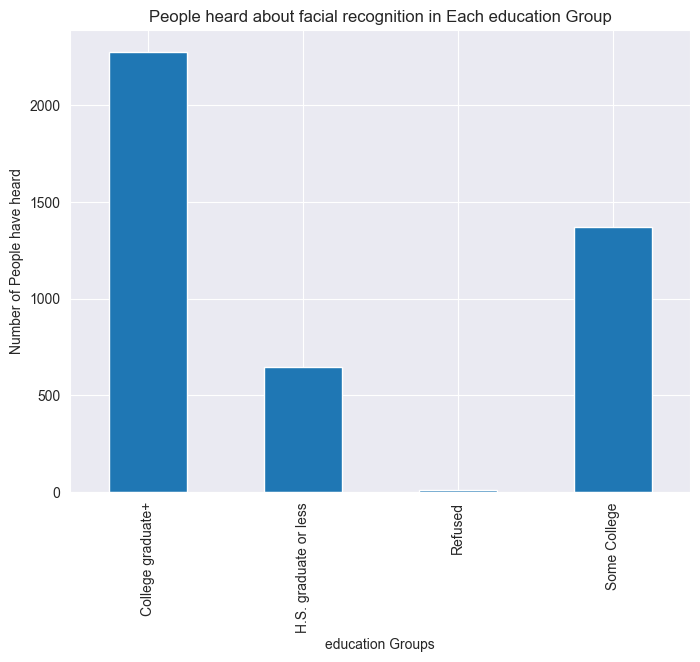

In [125]:
#plot 
plt.figure(figsize=(8,6))
ppl_h.plot(x= 'heard', y='ppl_h', kind='bar')
plt.title('People heard about facial recognition in Each education Group')
plt.xlabel('education Groups')
plt.ylabel('Number of People have heard')
plt.savefig("numbers of people have heard facial recognition.png")
plt.show()

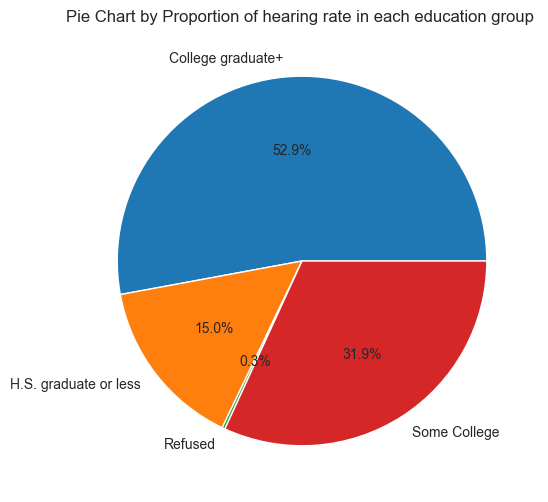

In [126]:
# pie plot show the proportion 
plt.figure(figsize=(6,6))
plt.title("Pie Chart by Proportion of hearing rate in each education group ")
plt.pie(percent_heard,labels=percent_heard.index,autopct='%1.1f%%')
plt.savefig("proportion of people have heard facial recognition.png")
plt.show()

In [127]:
#as we have 5153 observations -> find the proportion 
proportion_of_total_heard = 4298 / 5153
proportion_of_total_heard

0.8340772365612265

In [128]:
# frequency of def he_f (x):
def freq_hear(x):
    if x == 'A lot':
        return 2
    elif x == 'A little':
        return 1
    else:
        return 0

cl['fre_heard'] = cl['FACEREC1_W99'].apply(freq_hear)
cl['fre_heard']

0       1
1       1
2       0
3       0
4       1
       ..
5148    2
5149    1
5150    2
5151    2
5152    1
Name: fre_heard, Length: 5153, dtype: int64

+ so 4298 of people has heared about it before, which occupied the 83.4%.

In [129]:
# the average time of people heard about facial recognition by each educationt level
educ_heard = cl.groupby('F_EDUCCAT')['fre_heard'].mean()
educ_heard

F_EDUCCAT
College graduate+        1.101527
H.S. graduate or less    0.914481
Refused                  0.875000
Some College             1.059146
Name: fre_heard, dtype: float64

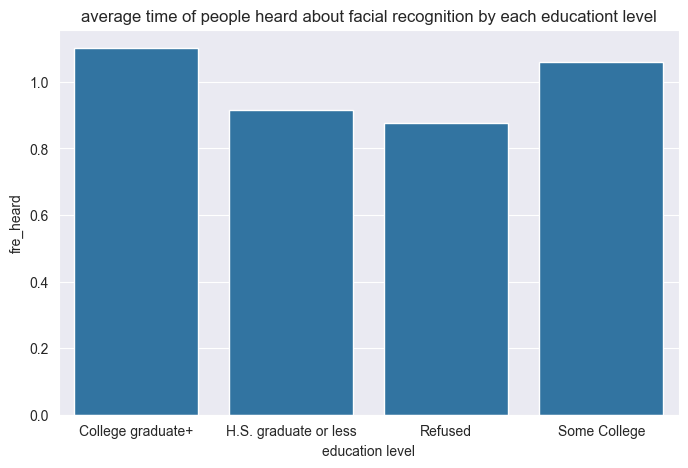

In [130]:
plt.figure(figsize=(8,5))
sns.barplot(educ_heard)
plt.title('average time of people heard about facial recognition by each educationt level')
plt.xlabel('education level')
plt.savefig("average time heard facial recognition.png")
plt.show()

## Feature Engineering

In [131]:
def accept_or_not(x):
    return 1 if x == 'Acceptable' else 0

def check_acceptability(row):
    answer = accept_or_not(row['FACEREC11_a_W99']) + accept_or_not(row['FACEREC11_b_W99']) + accept_or_not(row['FACEREC11_c_W99'])
    return 'Acceptable' if answer >= 2 else 'Not Acceptable'

face_df_cleaned['FACEREC_ACCEPT'] = face_df_cleaned.apply(check_acceptability, axis=1)
face_df_cleaned

,index,FACEREC1_W99,FACEREC2_W99,FACEREC3_a_W99,FACEREC3_b_W99,FACEREC3_c_W99,FACEREC3_d_W99,FACEREC3_e_W99,FACEREC3_f_W99,FACEREC4_W99,...,F_CREGION,F_PARTY_FINAL,F_EDUCCAT,F_EDUCCAT2,F_IDEO,F_INC_TIER2,INTERVIEW_START_W99,INTERVIEW_END_W99,duration,FACEREC_ACCEPT
0,1,A little,Good idea for society,Probably would happen,Probably would happen,Probably would happen,Definitely would happen,Probably would happen,Probably would happen,More fair,...,Midwest,Republican,Some College,"Some college, no degree",Liberal,Middle income,2021-11-04 12:35:35,2021-11-04 12:55:29,0 days 00:19:54,Acceptable
1,2,A little,Good idea for society,Probably would NOT happen,Probably would happen,Probably would happen,Probably would happen,Probably would happen,Probably would happen,More fair,...,Northeast,Democrat,College graduate+,Postgraduate,Moderate,Upper income,2021-11-03 20:23:43,2021-11-03 20:36:24,0 days 00:12:41,Acceptable
2,5,Nothing at all,Good idea for society,Probably would NOT happen,Probably would happen,Probably would NOT happen,Probably would happen,Probably would happen,Probably would NOT happen,More fair,...,Midwest,Republican,College graduate+,College graduate/some post grad,Conservative,Upper income,2021-11-03 19:22:44,2021-11-03 19:41:04,0 days 00:18:20,Acceptable
3,6,Nothing at all,Not sure,Probably would happen,Probably would happen,Probably would happen,Probably would happen,Probably would NOT happen,Probably would NOT happen,Not make much difference,...,South,Republican,Some College,"Some college, no degree",Conservative,Middle income,2021-11-03 18:18:21,2021-11-03 18:33:41,0 days 00:15:20,Not Acceptable
4,8,A little,Good idea for society,Definitely would NOT happen,Probably would happen,Definitely would NOT happen,Probably would happen,Probably would NOT happen,Definitely would happen,More fair,...,West,Republican,Some College,"Some college, no degree",Conservative,Upper income,2021-11-02 19:22:24,2021-11-02 19:35:23,0 days 00:12:59,Acceptable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5148,10252,A lot,Bad idea for society,Definitely would happen,Probably would happen,Definitely would happen,Probably would happen,Probably would happen,Probably would NOT happen,Not make much difference,...,West,Independent,College graduate+,College graduate/some post grad,Moderate,Lower income,2021-11-03 18:50:06,2021-11-03 19:02:32,0 days 00:12:26,Not Acceptable
5149,10253,A little,Good idea for society,Probably would NOT happen,Definitely would happen,Definitely would NOT happen,Definitely would happen,Probably would happen,Probably would happen,More fair,...,Midwest,Independent,H.S. graduate or less,High school graduate,Refused,Middle income,2021-11-02 14:27:17,2021-11-02 15:01:43,0 days 00:34:26,Acceptable
5150,10257,A lot,Good idea for society,Definitely would happen,Definitely would happen,Definitely would happen,Definitely would happen,Definitely would happen,Definitely would happen,More fair,...,South,Independent,Some College,Associate's degree,Liberal,Lower income,2021-11-04 16:30:29,2021-11-06 11:08:56,1 days 18:38:27,Not Acceptable
5151,10258,A lot,Not sure,Probably would NOT happen,Probably would happen,Probably would NOT happen,Probably would happen,Probably would happen,Probably would happen,Not make much difference,...,Midwest,Republican,Some College,"Some college, no degree",Moderate,Middle income,2021-11-06 15:22:13,2021-11-06 16:10:36,0 days 00:48:23,Acceptable


In [132]:
def favor_or_oppose(x):
    if x == 'Favor':
        return 1
    elif x =='Oppose':
        return -1
    else:
        return 0

def check_favor(row):
    acc = favor_or_oppose(row['FACEREC12_c_W99']) + favor_or_oppose(row['FACEREC12_d_W99'])
    return 'Favor' if acc > 0 else 'Oppose'

face_df_cleaned['FACEREC_FAVOR'] = face_df_cleaned.apply(check_favor, axis=1)
face_df_cleaned

,index,FACEREC1_W99,FACEREC2_W99,FACEREC3_a_W99,FACEREC3_b_W99,FACEREC3_c_W99,FACEREC3_d_W99,FACEREC3_e_W99,FACEREC3_f_W99,FACEREC4_W99,...,F_PARTY_FINAL,F_EDUCCAT,F_EDUCCAT2,F_IDEO,F_INC_TIER2,INTERVIEW_START_W99,INTERVIEW_END_W99,duration,FACEREC_ACCEPT,FACEREC_FAVOR
0,1,A little,Good idea for society,Probably would happen,Probably would happen,Probably would happen,Definitely would happen,Probably would happen,Probably would happen,More fair,...,Republican,Some College,"Some college, no degree",Liberal,Middle income,2021-11-04 12:35:35,2021-11-04 12:55:29,0 days 00:19:54,Acceptable,Favor
1,2,A little,Good idea for society,Probably would NOT happen,Probably would happen,Probably would happen,Probably would happen,Probably would happen,Probably would happen,More fair,...,Democrat,College graduate+,Postgraduate,Moderate,Upper income,2021-11-03 20:23:43,2021-11-03 20:36:24,0 days 00:12:41,Acceptable,Oppose
2,5,Nothing at all,Good idea for society,Probably would NOT happen,Probably would happen,Probably would NOT happen,Probably would happen,Probably would happen,Probably would NOT happen,More fair,...,Republican,College graduate+,College graduate/some post grad,Conservative,Upper income,2021-11-03 19:22:44,2021-11-03 19:41:04,0 days 00:18:20,Acceptable,Favor
3,6,Nothing at all,Not sure,Probably would happen,Probably would happen,Probably would happen,Probably would happen,Probably would NOT happen,Probably would NOT happen,Not make much difference,...,Republican,Some College,"Some college, no degree",Conservative,Middle income,2021-11-03 18:18:21,2021-11-03 18:33:41,0 days 00:15:20,Not Acceptable,Oppose
4,8,A little,Good idea for society,Definitely would NOT happen,Probably would happen,Definitely would NOT happen,Probably would happen,Probably would NOT happen,Definitely would happen,More fair,...,Republican,Some College,"Some college, no degree",Conservative,Upper income,2021-11-02 19:22:24,2021-11-02 19:35:23,0 days 00:12:59,Acceptable,Oppose
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5148,10252,A lot,Bad idea for society,Definitely would happen,Probably would happen,Definitely would happen,Probably would happen,Probably would happen,Probably would NOT happen,Not make much difference,...,Independent,College graduate+,College graduate/some post grad,Moderate,Lower income,2021-11-03 18:50:06,2021-11-03 19:02:32,0 days 00:12:26,Not Acceptable,Favor
5149,10253,A little,Good idea for society,Probably would NOT happen,Definitely would happen,Definitely would NOT happen,Definitely would happen,Probably would happen,Probably would happen,More fair,...,Independent,H.S. graduate or less,High school graduate,Refused,Middle income,2021-11-02 14:27:17,2021-11-02 15:01:43,0 days 00:34:26,Acceptable,Favor
5150,10257,A lot,Good idea for society,Definitely would happen,Definitely would happen,Definitely would happen,Definitely would happen,Definitely would happen,Definitely would happen,More fair,...,Independent,Some College,Associate's degree,Liberal,Lower income,2021-11-04 16:30:29,2021-11-06 11:08:56,1 days 18:38:27,Not Acceptable,Favor
5151,10258,A lot,Not sure,Probably would NOT happen,Probably would happen,Probably would NOT happen,Probably would happen,Probably would happen,Probably would happen,Not make much difference,...,Republican,Some College,"Some college, no degree",Moderate,Middle income,2021-11-06 15:22:13,2021-11-06 16:10:36,0 days 00:48:23,Acceptable,Favor


In [133]:
def heard_or_not (x):
    if x == 'A lot':
        return 1
    elif x == 'A little':
        return 1
    else:
        return 0

face_df_cleaned['FACEREC_HEARD'] = face_df_cleaned['FACEREC1_W99'].apply(heard_or_not)
face_df_cleaned

,index,FACEREC1_W99,FACEREC2_W99,FACEREC3_a_W99,FACEREC3_b_W99,FACEREC3_c_W99,FACEREC3_d_W99,FACEREC3_e_W99,FACEREC3_f_W99,FACEREC4_W99,...,F_EDUCCAT,F_EDUCCAT2,F_IDEO,F_INC_TIER2,INTERVIEW_START_W99,INTERVIEW_END_W99,duration,FACEREC_ACCEPT,FACEREC_FAVOR,FACEREC_HEARD
0,1,A little,Good idea for society,Probably would happen,Probably would happen,Probably would happen,Definitely would happen,Probably would happen,Probably would happen,More fair,...,Some College,"Some college, no degree",Liberal,Middle income,2021-11-04 12:35:35,2021-11-04 12:55:29,0 days 00:19:54,Acceptable,Favor,1
1,2,A little,Good idea for society,Probably would NOT happen,Probably would happen,Probably would happen,Probably would happen,Probably would happen,Probably would happen,More fair,...,College graduate+,Postgraduate,Moderate,Upper income,2021-11-03 20:23:43,2021-11-03 20:36:24,0 days 00:12:41,Acceptable,Oppose,1
2,5,Nothing at all,Good idea for society,Probably would NOT happen,Probably would happen,Probably would NOT happen,Probably would happen,Probably would happen,Probably would NOT happen,More fair,...,College graduate+,College graduate/some post grad,Conservative,Upper income,2021-11-03 19:22:44,2021-11-03 19:41:04,0 days 00:18:20,Acceptable,Favor,0
3,6,Nothing at all,Not sure,Probably would happen,Probably would happen,Probably would happen,Probably would happen,Probably would NOT happen,Probably would NOT happen,Not make much difference,...,Some College,"Some college, no degree",Conservative,Middle income,2021-11-03 18:18:21,2021-11-03 18:33:41,0 days 00:15:20,Not Acceptable,Oppose,0
4,8,A little,Good idea for society,Definitely would NOT happen,Probably would happen,Definitely would NOT happen,Probably would happen,Probably would NOT happen,Definitely would happen,More fair,...,Some College,"Some college, no degree",Conservative,Upper income,2021-11-02 19:22:24,2021-11-02 19:35:23,0 days 00:12:59,Acceptable,Oppose,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5148,10252,A lot,Bad idea for society,Definitely would happen,Probably would happen,Definitely would happen,Probably would happen,Probably would happen,Probably would NOT happen,Not make much difference,...,College graduate+,College graduate/some post grad,Moderate,Lower income,2021-11-03 18:50:06,2021-11-03 19:02:32,0 days 00:12:26,Not Acceptable,Favor,1
5149,10253,A little,Good idea for society,Probably would NOT happen,Definitely would happen,Definitely would NOT happen,Definitely would happen,Probably would happen,Probably would happen,More fair,...,H.S. graduate or less,High school graduate,Refused,Middle income,2021-11-02 14:27:17,2021-11-02 15:01:43,0 days 00:34:26,Acceptable,Favor,1
5150,10257,A lot,Good idea for society,Definitely would happen,Definitely would happen,Definitely would happen,Definitely would happen,Definitely would happen,Definitely would happen,More fair,...,Some College,Associate's degree,Liberal,Lower income,2021-11-04 16:30:29,2021-11-06 11:08:56,1 days 18:38:27,Not Acceptable,Favor,1
5151,10258,A lot,Not sure,Probably would NOT happen,Probably would happen,Probably would NOT happen,Probably would happen,Probably would happen,Probably would happen,Not make much difference,...,Some College,"Some college, no degree",Moderate,Middle income,2021-11-06 15:22:13,2021-11-06 16:10:36,0 days 00:48:23,Acceptable,Favor,1


In [134]:
number_of_total_heard = face_df_cleaned['FACEREC_HEARD'].sum()
number_of_total_heard

4298

## Region, Educcation, Political Analysis

In [135]:
face_df_cleaned['F_CREGION'].count()

5153

<Axes: xlabel='F_CREGION', ylabel='Count'>

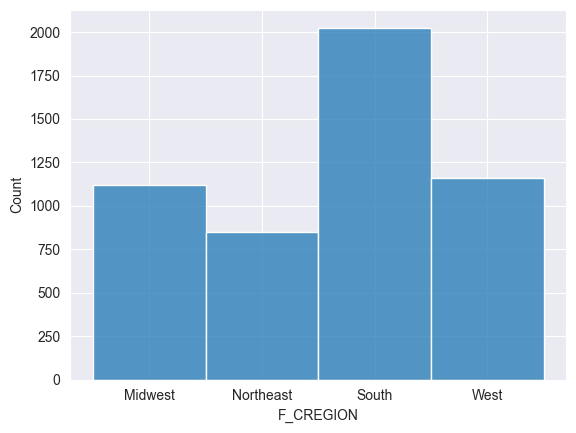

In [136]:
sns.histplot(face_df_cleaned['F_CREGION'])

In [137]:
face_df_cleaned

,index,FACEREC1_W99,FACEREC2_W99,FACEREC3_a_W99,FACEREC3_b_W99,FACEREC3_c_W99,FACEREC3_d_W99,FACEREC3_e_W99,FACEREC3_f_W99,FACEREC4_W99,...,F_EDUCCAT,F_EDUCCAT2,F_IDEO,F_INC_TIER2,INTERVIEW_START_W99,INTERVIEW_END_W99,duration,FACEREC_ACCEPT,FACEREC_FAVOR,FACEREC_HEARD
0,1,A little,Good idea for society,Probably would happen,Probably would happen,Probably would happen,Definitely would happen,Probably would happen,Probably would happen,More fair,...,Some College,"Some college, no degree",Liberal,Middle income,2021-11-04 12:35:35,2021-11-04 12:55:29,0 days 00:19:54,Acceptable,Favor,1
1,2,A little,Good idea for society,Probably would NOT happen,Probably would happen,Probably would happen,Probably would happen,Probably would happen,Probably would happen,More fair,...,College graduate+,Postgraduate,Moderate,Upper income,2021-11-03 20:23:43,2021-11-03 20:36:24,0 days 00:12:41,Acceptable,Oppose,1
2,5,Nothing at all,Good idea for society,Probably would NOT happen,Probably would happen,Probably would NOT happen,Probably would happen,Probably would happen,Probably would NOT happen,More fair,...,College graduate+,College graduate/some post grad,Conservative,Upper income,2021-11-03 19:22:44,2021-11-03 19:41:04,0 days 00:18:20,Acceptable,Favor,0
3,6,Nothing at all,Not sure,Probably would happen,Probably would happen,Probably would happen,Probably would happen,Probably would NOT happen,Probably would NOT happen,Not make much difference,...,Some College,"Some college, no degree",Conservative,Middle income,2021-11-03 18:18:21,2021-11-03 18:33:41,0 days 00:15:20,Not Acceptable,Oppose,0
4,8,A little,Good idea for society,Definitely would NOT happen,Probably would happen,Definitely would NOT happen,Probably would happen,Probably would NOT happen,Definitely would happen,More fair,...,Some College,"Some college, no degree",Conservative,Upper income,2021-11-02 19:22:24,2021-11-02 19:35:23,0 days 00:12:59,Acceptable,Oppose,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5148,10252,A lot,Bad idea for society,Definitely would happen,Probably would happen,Definitely would happen,Probably would happen,Probably would happen,Probably would NOT happen,Not make much difference,...,College graduate+,College graduate/some post grad,Moderate,Lower income,2021-11-03 18:50:06,2021-11-03 19:02:32,0 days 00:12:26,Not Acceptable,Favor,1
5149,10253,A little,Good idea for society,Probably would NOT happen,Definitely would happen,Definitely would NOT happen,Definitely would happen,Probably would happen,Probably would happen,More fair,...,H.S. graduate or less,High school graduate,Refused,Middle income,2021-11-02 14:27:17,2021-11-02 15:01:43,0 days 00:34:26,Acceptable,Favor,1
5150,10257,A lot,Good idea for society,Definitely would happen,Definitely would happen,Definitely would happen,Definitely would happen,Definitely would happen,Definitely would happen,More fair,...,Some College,Associate's degree,Liberal,Lower income,2021-11-04 16:30:29,2021-11-06 11:08:56,1 days 18:38:27,Not Acceptable,Favor,1
5151,10258,A lot,Not sure,Probably would NOT happen,Probably would happen,Probably would NOT happen,Probably would happen,Probably would happen,Probably would happen,Not make much difference,...,Some College,"Some college, no degree",Moderate,Middle income,2021-11-06 15:22:13,2021-11-06 16:10:36,0 days 00:48:23,Acceptable,Favor,1


In [138]:
region_group = face_df_cleaned.groupby(['FACEREC_ACCEPT','F_CREGION'])
region_group

In [139]:
accpt_reg = region_group['FACEREC_ACCEPT'].size().reset_index(name='count')
accpt_reg

,FACEREC_ACCEPT,F_CREGION,count
0,Acceptable,Midwest,628
1,Acceptable,Northeast,468
2,Acceptable,South,1194
3,Acceptable,West,595
4,Not Acceptable,Midwest,491
5,Not Acceptable,Northeast,381
6,Not Acceptable,South,832
7,Not Acceptable,West,564


In [140]:
region_count = face_df_cleaned.groupby('F_CREGION').size().reset_index(name='total_count_region')
region_count

,F_CREGION,total_count_region
0,Midwest,1119
1,Northeast,849
2,South,2026
3,West,1159


In [141]:
dict = {'Midwest': 1119, 'Northeast': 849, 'South': 2026,'West': 1159}
accpt_reg['total_count_region'] = accpt_reg['F_CREGION'].map(dict)
accpt_reg

,FACEREC_ACCEPT,F_CREGION,count,total_count_region
0,Acceptable,Midwest,628,1119
1,Acceptable,Northeast,468,849
2,Acceptable,South,1194,2026
3,Acceptable,West,595,1159
4,Not Acceptable,Midwest,491,1119
5,Not Acceptable,Northeast,381,849
6,Not Acceptable,South,832,2026
7,Not Acceptable,West,564,1159


In [142]:
accpt_reg['proportion'] = accpt_reg['count'] / accpt_reg['total_count_region']
accpt_reg

,FACEREC_ACCEPT,F_CREGION,count,total_count_region,proportion
0,Acceptable,Midwest,628,1119,0.561215
1,Acceptable,Northeast,468,849,0.551237
2,Acceptable,South,1194,2026,0.589339
3,Acceptable,West,595,1159,0.513374
4,Not Acceptable,Midwest,491,1119,0.438785
5,Not Acceptable,Northeast,381,849,0.448763
6,Not Acceptable,South,832,2026,0.410661
7,Not Acceptable,West,564,1159,0.486626


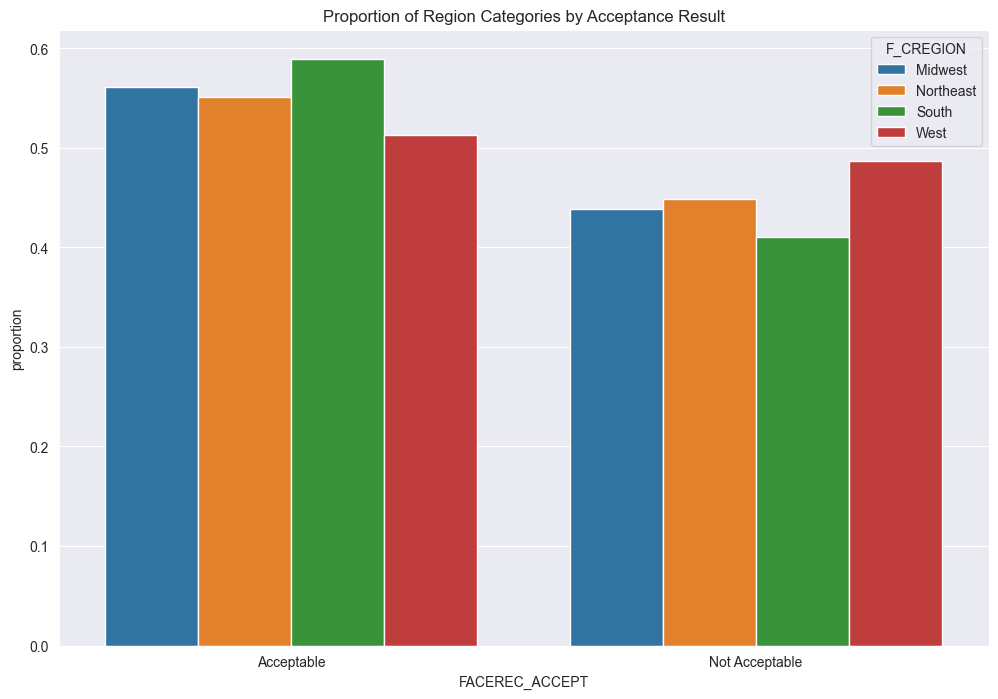

In [143]:
plt.figure(figsize=(12, 8))
sns.barplot(data = accpt_reg, x='FACEREC_ACCEPT', y='proportion', hue='F_CREGION')
plt.title('Proportion of Region Categories by Acceptance Result')
plt.savefig("Proportion of Region Categories by Acceptance Result.png")
plt.show()

In [144]:
party_group = face_df_cleaned.groupby(['FACEREC_ACCEPT','F_PARTY_FINAL'])
party_group

In [145]:
accpt_group = party_group['FACEREC_ACCEPT'].size().reset_index(name='count')
accpt_group

,FACEREC_ACCEPT,F_PARTY_FINAL,count
0,Acceptable,Democrat,876
1,Acceptable,Independent,781
2,Acceptable,Refused,30
3,Acceptable,Republican,1006
4,Acceptable,Something else,192
5,Not Acceptable,Democrat,774
6,Not Acceptable,Independent,615
7,Not Acceptable,Refused,25
8,Not Acceptable,Republican,606
9,Not Acceptable,Something else,248


In [146]:
party_count = face_df_cleaned.groupby('F_PARTY_FINAL').size().reset_index(name='total_count_party')
party_count

,F_PARTY_FINAL,total_count_party
0,Democrat,1650
1,Independent,1396
2,Refused,55
3,Republican,1612
4,Something else,440


In [147]:
dict = {'Democrat': 1650, 'Independent': 1396, 'Refused': 55,'Republican': 1612, 'Something else': 440}
accpt_group['total_count_party'] = accpt_group['F_PARTY_FINAL'].map(dict)
accpt_group

,FACEREC_ACCEPT,F_PARTY_FINAL,count,total_count_party
0,Acceptable,Democrat,876,1650
1,Acceptable,Independent,781,1396
2,Acceptable,Refused,30,55
3,Acceptable,Republican,1006,1612
4,Acceptable,Something else,192,440
5,Not Acceptable,Democrat,774,1650
6,Not Acceptable,Independent,615,1396
7,Not Acceptable,Refused,25,55
8,Not Acceptable,Republican,606,1612
9,Not Acceptable,Something else,248,440


In [148]:
accpt_group['proportion'] = accpt_group['count']/accpt_group['total_count_party']
accpt_group


,FACEREC_ACCEPT,F_PARTY_FINAL,count,total_count_party,proportion
0,Acceptable,Democrat,876,1650,0.530909
1,Acceptable,Independent,781,1396,0.559456
2,Acceptable,Refused,30,55,0.545455
3,Acceptable,Republican,1006,1612,0.624069
4,Acceptable,Something else,192,440,0.436364
5,Not Acceptable,Democrat,774,1650,0.469091
6,Not Acceptable,Independent,615,1396,0.440544
7,Not Acceptable,Refused,25,55,0.454545
8,Not Acceptable,Republican,606,1612,0.375931
9,Not Acceptable,Something else,248,440,0.563636


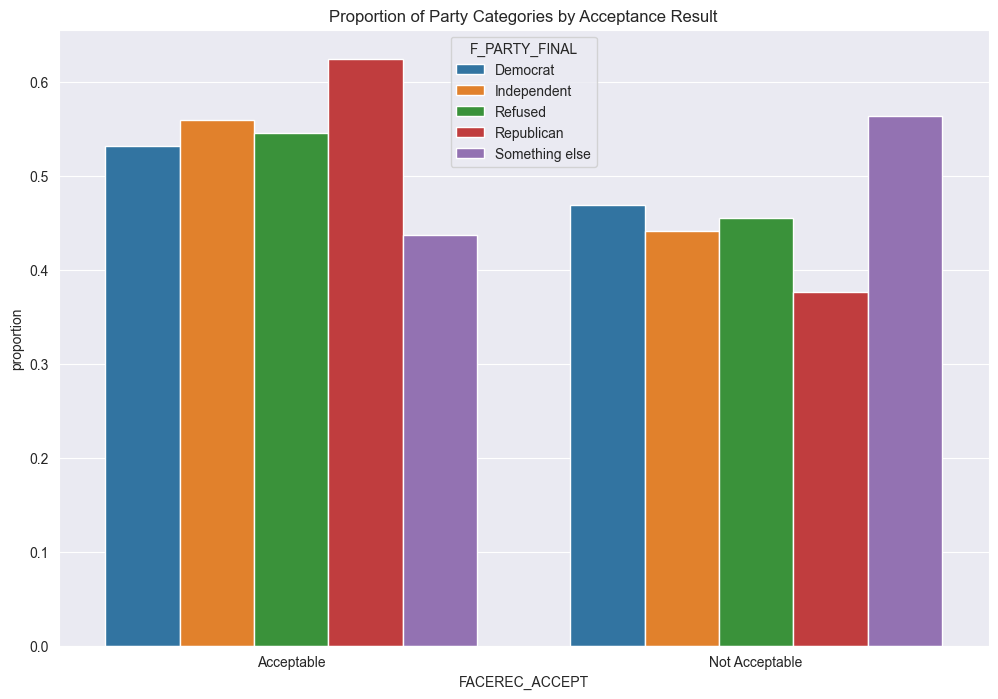

In [149]:
plt.figure(figsize=(12, 8))
sns.barplot(data = accpt_group, x='FACEREC_ACCEPT', y='proportion', hue='F_PARTY_FINAL')
plt.title('Proportion of Party Categories by Acceptance Result')
plt.savefig("Proportion of Party Categories by Acceptance Result.png")
plt.show()

In [150]:
edu_group = face_df_cleaned.groupby(['FACEREC_ACCEPT','F_EDUCCAT'])
edu_group

edu2_group = face_df_cleaned.groupby(['FACEREC_ACCEPT','F_EDUCCAT2'])
edu2_group

In [151]:
accpt_edu = edu_group['FACEREC_ACCEPT'].size().reset_index(name='count')
accpt_edu
accpt_edu2 = edu2_group['FACEREC_ACCEPT'].size().reset_index(name='count')
accpt_edu2

,FACEREC_ACCEPT,F_EDUCCAT2,count
0,Acceptable,Associate's degree,321
1,Acceptable,College graduate/some post grad,795
2,Acceptable,High school graduate,425
3,Acceptable,Less than high school,86
4,Acceptable,Postgraduate,609
5,Acceptable,Refused,4
6,Acceptable,"Some college, no degree",645
7,Not Acceptable,Associate's degree,236
8,Not Acceptable,College graduate/some post grad,648
9,Not Acceptable,High school graduate,292


In [152]:
total_count_3 = face_df_cleaned.groupby('F_EDUCCAT').size().reset_index(name='total_count_edu')
total_count_3

,F_EDUCCAT,total_count_edu
0,College graduate+,2620
1,H.S. graduate or less,877
2,Refused,16
3,Some College,1640


In [153]:
dict = {'College graduate+': 2620, 'H.S. graduate or less': 877, 'Refused': 16,'Some College': 1640}
accpt_edu['total_count_edu'] = accpt_edu['F_EDUCCAT'].map(dict)
accpt_edu['proportion'] = accpt_edu['count'] / accpt_edu['total_count_edu']
accpt_edu

,FACEREC_ACCEPT,F_EDUCCAT,count,total_count_edu,proportion
0,Acceptable,College graduate+,1404,2620,0.535878
1,Acceptable,H.S. graduate or less,511,877,0.582668
2,Acceptable,Refused,4,16,0.250000
3,Acceptable,Some College,966,1640,0.589024
4,Not Acceptable,College graduate+,1216,2620,0.464122
5,Not Acceptable,H.S. graduate or less,366,877,0.417332
6,Not Acceptable,Refused,12,16,0.750000
7,Not Acceptable,Some College,674,1640,0.410976


In [154]:
total_count_4 = face_df_cleaned.groupby('F_EDUCCAT2').size().reset_index(name='total_count_edu')
total_count_4

,F_EDUCCAT2,total_count_edu
0,Associate's degree,557
1,College graduate/some post grad,1443
2,High school graduate,717
3,Less than high school,160
4,Postgraduate,1177
5,Refused,16
6,"Some college, no degree",1083


In [155]:
dict = {"Associate's degree": 557, 'College graduate/some post grad': 1443, 'High school graduate': 717,'Less than high school': 160, 'Postgraduate': 1177, 'Refused': 16
    , 'Some college, no degree': 1083}
accpt_edu2['total_count_edu2'] = accpt_edu2['F_EDUCCAT2'].map(dict)
accpt_edu2['proportion'] = accpt_edu2['count'] / accpt_edu2['total_count_edu2']

accpt_edu2

,FACEREC_ACCEPT,F_EDUCCAT2,count,total_count_edu2,proportion
0,Acceptable,Associate's degree,321,557,0.576302
1,Acceptable,College graduate/some post grad,795,1443,0.550936
2,Acceptable,High school graduate,425,717,0.592748
3,Acceptable,Less than high school,86,160,0.537500
4,Acceptable,Postgraduate,609,1177,0.517417
5,Acceptable,Refused,4,16,0.250000
6,Acceptable,"Some college, no degree",645,1083,0.595568
7,Not Acceptable,Associate's degree,236,557,0.423698
8,Not Acceptable,College graduate/some post grad,648,1443,0.449064
9,Not Acceptable,High school graduate,292,717,0.407252


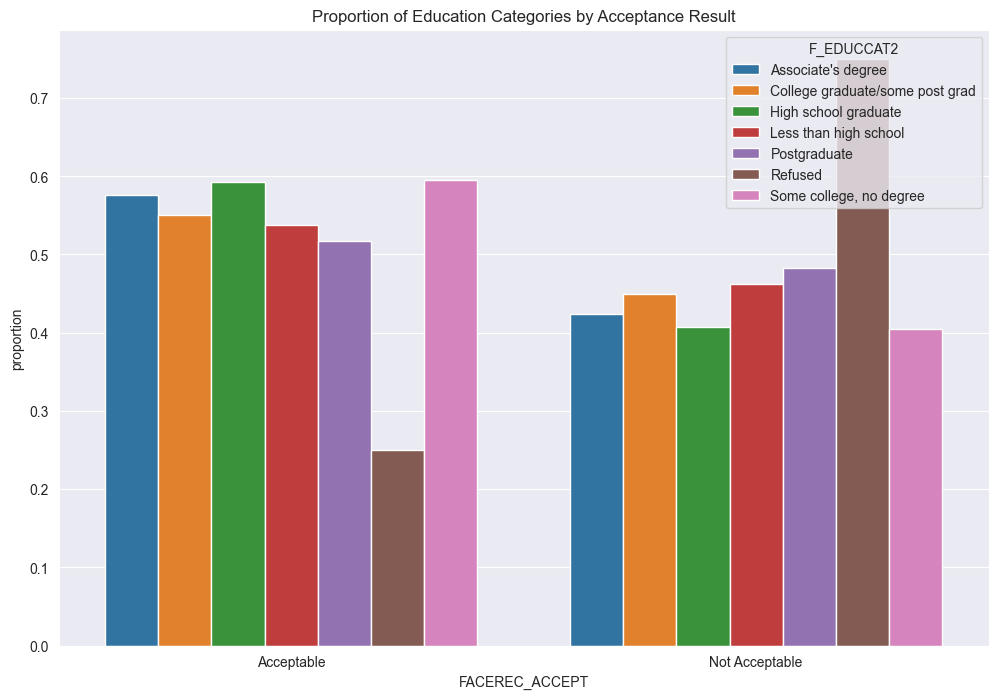

In [156]:
plt.figure(figsize=(12, 8))
sns.barplot(data = accpt_edu2, x='FACEREC_ACCEPT', y='proportion', hue='F_EDUCCAT2')
plt.title('Proportion of Education Categories by Acceptance Result')
plt.savefig("Proportion of Education Categories by Acceptance Result.png")
plt.show()

The higher the level of education the lower chance of someone accepting facial recognition use by police 

# Classification

## Objectives for the prediction 

#### Predict whether the overall acceptability of facial recognition is "Acceptable" or "Not Acceptable".


#### Logistic Regression model for acceptable the facial recognition or not based on the face_df_cleaned data set

In [157]:
# Encode the target variable
label_encoder = LabelEncoder()
face_df_cleaned['FACEREC_FAVOR_ENCODED'] = label_encoder.fit_transform(face_df_cleaned['FACEREC_FAVOR'])

# features
features = face_df_cleaned[['F_CREGION', 'F_PARTY_FINAL', 'F_EDUCCAT']]

# Encode categorical features
features_encoded = pd.get_dummies(features)

# data splitting
X_train, X_test, y_train, y_test = train_test_split(features_encoded,face_df_cleaned['FACEREC_FAVOR_ENCODED'], test_size=0.3, random_state=42)

# Train the logistic regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [158]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)
confusion_matrix_arr = confusion_matrix(y_test, y_pred)


print('Accuracy:', accuracy)
print('classification result:', classification_report_str)
print('confusion matrix:', confusion_matrix_arr)

Accuracy: 0.5206985769728332
classification result:               precision    recall  f1-score   support

           0       0.52      0.80      0.63       792
           1       0.52      0.23      0.31       754

    accuracy                           0.52      1546
   macro avg       0.52      0.51      0.47      1546
weighted avg       0.52      0.52      0.48      1546

confusion matrix: [[635 157]
 [584 170]]


In [159]:
mse_acc = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse_acc)

Mean Squared Error: 0.4793014230271669


##  Predicting People's Preferences for Whether Facial Recognition Can Be Used for Multiple Purposes
## Logistic Regression 

In [160]:
# Encode the target variable
label_encoder = LabelEncoder()
face_df_cleaned['FACEREC_FAVOR_ENCODED'] = label_encoder.fit_transform(face_df_cleaned['FACEREC_FAVOR'])

# features
features = face_df_cleaned[['FACEREC11_a_W99', 'FACEREC11_b_W99', 'FACEREC11_c_W99','F_CREGION', 'F_PARTY_FINAL', 'F_EDUCCAT']]
target = face_df_cleaned['FACEREC_FAVOR']

# Encode categorical features
features_encoded = pd.get_dummies(features)

# data splitting
X_train, X_test, y_train, y_test = train_test_split(features_encoded,face_df_cleaned['FACEREC_FAVOR_ENCODED'], test_size=0.3, random_state=42)

# Train the logistic regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

Accuracy: 0.6959896507115135
classification result:               precision    recall  f1-score   support

           0       0.69      0.72      0.71       792
           1       0.70      0.67      0.68       754

    accuracy                           0.70      1546
   macro avg       0.70      0.70      0.70      1546
weighted avg       0.70      0.70      0.70      1546

confusion matrix: [[574 218]
 [252 502]]


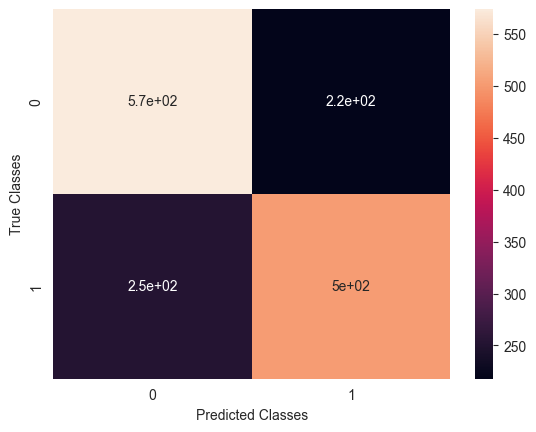

In [161]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)
confusion_matrix_arr = confusion_matrix(y_test, y_pred)

print('Accuracy:', accuracy)
print('classification result:', classification_report_str)
print('confusion matrix:', confusion_matrix_arr)

# visualization the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.ylabel('True Classes')
plt.xlabel('Predicted Classes')
plt.savefig("confusion matrix.png")
plt.show()

In [162]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.3040103492884864


#### Accuracy is about 0.7, indicating that 70% of the total predictions are correct.
#### The squared difference between the actual and predicted class labels is 0.304. The error in the model’s predictions is acceptable

In [163]:
cross_val_score(LogisticRegression(), X_train, y_train, cv=5)

array([0.70221607, 0.72160665, 0.69348128, 0.67545076, 0.68238558])

In [164]:
scores = cross_val_score(LogisticRegression(), X_train, y_train, cv=5, scoring='f1')
scores

array([0.66248038, 0.70310192, 0.66156202, 0.63207547, 0.64050235])

In [165]:
np.mean(scores)

0.6599444289856239

#### Analyzing the trade off

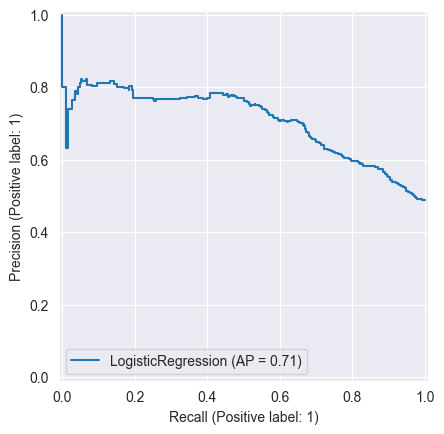

In [166]:
# trade off
display = PrecisionRecallDisplay.from_estimator(model, X_test, y_test)
plt.savefig("model trade off.png")
plt.show()

In [167]:
## Make predictions
predicted_data = model.predict(X_test)

# Print predictions
print("Predictions:")
print(predicted_data)
face_df_cleaned

Predictions:
[0 1 0 ... 0 0 0]


,index,FACEREC1_W99,FACEREC2_W99,FACEREC3_a_W99,FACEREC3_b_W99,FACEREC3_c_W99,FACEREC3_d_W99,FACEREC3_e_W99,FACEREC3_f_W99,FACEREC4_W99,...,F_EDUCCAT2,F_IDEO,F_INC_TIER2,INTERVIEW_START_W99,INTERVIEW_END_W99,duration,FACEREC_ACCEPT,FACEREC_FAVOR,FACEREC_HEARD,FACEREC_FAVOR_ENCODED
0,1,A little,Good idea for society,Probably would happen,Probably would happen,Probably would happen,Definitely would happen,Probably would happen,Probably would happen,More fair,...,"Some college, no degree",Liberal,Middle income,2021-11-04 12:35:35,2021-11-04 12:55:29,0 days 00:19:54,Acceptable,Favor,1,0
1,2,A little,Good idea for society,Probably would NOT happen,Probably would happen,Probably would happen,Probably would happen,Probably would happen,Probably would happen,More fair,...,Postgraduate,Moderate,Upper income,2021-11-03 20:23:43,2021-11-03 20:36:24,0 days 00:12:41,Acceptable,Oppose,1,1
2,5,Nothing at all,Good idea for society,Probably would NOT happen,Probably would happen,Probably would NOT happen,Probably would happen,Probably would happen,Probably would NOT happen,More fair,...,College graduate/some post grad,Conservative,Upper income,2021-11-03 19:22:44,2021-11-03 19:41:04,0 days 00:18:20,Acceptable,Favor,0,0
3,6,Nothing at all,Not sure,Probably would happen,Probably would happen,Probably would happen,Probably would happen,Probably would NOT happen,Probably would NOT happen,Not make much difference,...,"Some college, no degree",Conservative,Middle income,2021-11-03 18:18:21,2021-11-03 18:33:41,0 days 00:15:20,Not Acceptable,Oppose,0,1
4,8,A little,Good idea for society,Definitely would NOT happen,Probably would happen,Definitely would NOT happen,Probably would happen,Probably would NOT happen,Definitely would happen,More fair,...,"Some college, no degree",Conservative,Upper income,2021-11-02 19:22:24,2021-11-02 19:35:23,0 days 00:12:59,Acceptable,Oppose,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5148,10252,A lot,Bad idea for society,Definitely would happen,Probably would happen,Definitely would happen,Probably would happen,Probably would happen,Probably would NOT happen,Not make much difference,...,College graduate/some post grad,Moderate,Lower income,2021-11-03 18:50:06,2021-11-03 19:02:32,0 days 00:12:26,Not Acceptable,Favor,1,0
5149,10253,A little,Good idea for society,Probably would NOT happen,Definitely would happen,Definitely would NOT happen,Definitely would happen,Probably would happen,Probably would happen,More fair,...,High school graduate,Refused,Middle income,2021-11-02 14:27:17,2021-11-02 15:01:43,0 days 00:34:26,Acceptable,Favor,1,0
5150,10257,A lot,Good idea for society,Definitely would happen,Definitely would happen,Definitely would happen,Definitely would happen,Definitely would happen,Definitely would happen,More fair,...,Associate's degree,Liberal,Lower income,2021-11-04 16:30:29,2021-11-06 11:08:56,1 days 18:38:27,Not Acceptable,Favor,1,0
5151,10258,A lot,Not sure,Probably would NOT happen,Probably would happen,Probably would NOT happen,Probably would happen,Probably would happen,Probably would happen,Not make much difference,...,"Some college, no degree",Moderate,Middle income,2021-11-06 15:22:13,2021-11-06 16:10:36,0 days 00:48:23,Acceptable,Favor,1,0


# Clustering

In [168]:
# Columns to be used for clustering
clustering_columns = ['F_CREGION', 'F_EDUCCAT2', 'F_PARTY_FINAL', 'FACEREC_ACCEPT', 'FACEREC_FAVOR']
# Select relevant columns
df_clustering = face_df_cleaned[clustering_columns]

# Encode categorical variables
le = LabelEncoder()

for column in df_clustering.columns:
    df_clustering[column] = le.fit_transform(df_clustering[column])

ohe = OneHotEncoder(sparse_output=False)
ohe_clust_df = ohe.fit_transform(df_clustering)

encoded_df = pd.DataFrame(ohe_clust_df, columns=ohe.get_feature_names_out(df_clustering.columns))

C:\Users\DELL\AppData\Local\Temp\ipykernel_25940\3539015832.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clustering[column] = le.fit_transform(df_clustering[column])
C:\Users\DELL\AppData\Local\Temp\ipykernel_25940\3539015832.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clustering[column] = le.fit_transform(df_clustering[column])
C:\Users\DELL\AppData\Local\Temp\ipykernel_25940\3539015832.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

## K Modes

In [169]:
output_columns = clustering_columns + ['Cluster_kmodes']

# Initialize and fit the K-modes model
n_clusters=20
km = KModes(n_clusters=n_clusters, init='random', n_init=10, verbose=1)
clusters = km.fit_predict(df_clustering)

# Add cluster labels to the original dataframe
face_df_cleaned['Cluster_kmodes'] = clusters


# Function to get mode of each column per cluster
def get_cluster_modes(df, cluster_num):
    cluster_data = df[df['Cluster_kmodes'] == cluster_num]
    return cluster_data.mode().iloc[0]

# Get modes of each cluster
cluster_modes = [get_cluster_modes(face_df_cleaned[output_columns], i) for i in range(n_clusters)]

cluster_modes_df = pd.DataFrame(cluster_modes)

# Print the mode of each cluster
cluster_modes_df

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 503, cost: 6153.0
Run 1, iteration: 2/100, moves: 3, cost: 6153.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 627, cost: 6267.0
Run 2, iteration: 2/100, moves: 8, cost: 6267.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 823, cost: 6390.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 1038, cost: 6185.0
Run 4, iteration: 2/100, moves: 10, cost: 6185.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 713, cost: 6124.0
Run 5, iteration: 2/100, moves: 1, cost: 6124.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 485, cost: 6207.0
Init: initializing centroi

,F_CREGION,F_EDUCCAT2,F_PARTY_FINAL,FACEREC_ACCEPT,FACEREC_FAVOR,Cluster_kmodes
0,Northeast,"Some college, no degree",Independent,Acceptable,Oppose,0
0,Northeast,"Some college, no degree",Independent,Not Acceptable,Favor,1
0,Midwest,"Some college, no degree",Something else,Not Acceptable,Oppose,2
0,West,Postgraduate,Republican,Acceptable,Favor,3
0,West,Postgraduate,Something else,Acceptable,Favor,4
0,Northeast,"Some college, no degree",Republican,Acceptable,Oppose,5
0,South,College graduate/some post grad,Republican,Acceptable,Favor,6
0,South,Associate's degree,Republican,Not Acceptable,Oppose,7
0,Northeast,Postgraduate,Democrat,Not Acceptable,Oppose,8
0,West,College graduate/some post grad,Independent,Not Acceptable,Oppose,9


In [170]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score to evaluate the clustering
score = silhouette_score(df_clustering, clusters)
print("Silhouette Score - KModes: ", score)


Silhouette Score - KModes:  -0.10376366981201252


In [171]:
# Elbow curve to find optimal K 
cost = []
K = range(1,20)
for k in list(K):
    kmode = KModes(n_clusters=k, init = "random", n_init = 10, verbose=1)
    kmode.fit_predict(df_clustering)
    cost.append(kmode.cost_)

plt.plot(K, cost, 'x-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Curve')
plt.show()

# Seems like 14 is optimal

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 15055.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 15055.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 15055.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 15055.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 15055.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 0, cost: 15055.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, iteration: 1/100, moves: 0, cost: 15055.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 8, iteration:

KeyboardInterrupt: 

## Hierarchical Clustering

In [172]:
output_columns = clustering_columns + ['Cluster_hamming', 'Cluster_euclidean']
output_columns

# Compute the Hamming distance matrix
hamming_dist_matrix = pdist(df_clustering, metric='hamming')
# Compute the Euclidean distance matrix
euclidean_dist_matrix = pdist(encoded_df, metric='euclidean')

# Perform hierarchical clustering
Z_hamming = linkage(hamming_dist_matrix, method='ward')
Z_euclidean = linkage(euclidean_dist_matrix, method='ward')

In [ ]:
# Plot the dendrogram
plt.figure(figsize=(10, 7))
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(18, 9))
dendrogram(Z_hamming, labels=df_clustering.index, leaf_rotation=90, ax=ax1)
dendrogram(Z_euclidean, labels=encoded_df.index, leaf_rotation=90, ax=ax2)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

In [173]:

# Determine the number of clusters from the dendrogram
# Here we use a threshold value to cut the dendrogram
threshold_hamming = 6
threshold_euclidean = 20

clusters_hamming = fcluster(Z_hamming, threshold_hamming, criterion='distance')
clusters_euclidean = fcluster(Z_euclidean, threshold_euclidean, criterion='distance')


# Add cluster labels to the original dataframe
face_df_cleaned['Cluster_hamming'] = clusters_hamming
face_df_cleaned['Cluster_euclidean'] = clusters_euclidean

# Function to get mode of each column per cluster
def get_cluster_modes(df, cluster_num, type):
    key = "Cluster" + type
    cluster_data = df[df[key] == cluster_num]
    return cluster_data.mode().iloc[0]

# Get modes of each cluster
unique_clusters_hamming = face_df_cleaned['Cluster_hamming'].unique()
unique_clusters_euclidean = face_df_cleaned['Cluster_euclidean'].unique()


cluster_modes_hamming = [get_cluster_modes(face_df_cleaned[output_columns], cluster, '_hamming') for cluster in unique_clusters_hamming]
cluster_modes_euclidean = [get_cluster_modes(face_df_cleaned[output_columns], cluster, '_euclidean') for cluster in unique_clusters_euclidean]

cluster_modes_hamming_df = pd.DataFrame(cluster_modes_hamming)
cluster_modes_euclidean_df = pd.DataFrame(cluster_modes_euclidean)


# Calculate the silhouette score to evaluate the clustering
score_hamming = silhouette_score(df_clustering, clusters_hamming, metric='hamming')
score_euclidean = silhouette_score(encoded_df, clusters_euclidean, metric='euclidean')
print("Silhouette Score - Hierarchical Clustering - Hamming Distance: ", score_hamming)
print("Silhouette Score - Hierarchical Clustering - Euclidean Distance: ", score_euclidean)

Silhouette Score - Hierarchical Clustering - Hamming Distance:  0.19173287486650237
Silhouette Score - Hierarchical Clustering - Euclidean Distance:  0.13732588534298232


In [174]:
cluster_modes_euclidean_df

,F_CREGION,F_EDUCCAT2,F_PARTY_FINAL,FACEREC_ACCEPT,FACEREC_FAVOR,Cluster_hamming,Cluster_euclidean
0,South,"Some college, no degree",Democrat,Acceptable,Favor,10.0,14.0
0,South,"Some college, no degree",Independent,Acceptable,Oppose,6.0,2.0
0,South,College graduate/some post grad,Republican,Acceptable,Favor,10.0,9.0
0,South,College graduate/some post grad,Republican,Not Acceptable,Oppose,4.0,4.0
0,South,College graduate/some post grad,Democrat,Not Acceptable,Favor,1.0,8.0
0,South,Associate's degree,Republican,Acceptable,Favor,11.0,13.0
0,Northeast,College graduate/some post grad,Democrat,Not Acceptable,Oppose,2.0,6.0
0,Midwest,College graduate/some post grad,Republican,Not Acceptable,Oppose,5.0,3.0
0,South,College graduate/some post grad,Independent,Not Acceptable,Oppose,3.0,5.0
0,South,High school graduate,Republican,Acceptable,Favor,11.0,12.0


In [175]:
cluster_modes_hamming_df

,F_CREGION,F_EDUCCAT2,F_PARTY_FINAL,FACEREC_ACCEPT,FACEREC_FAVOR,Cluster_hamming,Cluster_euclidean
0,South,College graduate/some post grad,Republican,Acceptable,Favor,10.0,9
0,South,College graduate/some post grad,Republican,Acceptable,Oppose,6.0,2
0,South,"Some college, no degree",Republican,Not Acceptable,Oppose,4.0,4
0,South,College graduate/some post grad,Democrat,Not Acceptable,Favor,1.0,8
0,South,High school graduate,Republican,Acceptable,Favor,11.0,12
0,South,College graduate/some post grad,Independent,Acceptable,Favor,7.0,9
0,Northeast,Postgraduate,Democrat,Not Acceptable,Oppose,2.0,6
0,South,Postgraduate,Democrat,Acceptable,Favor,8.0,14
0,Midwest,College graduate/some post grad,Republican,Not Acceptable,Oppose,5.0,3
0,West,College graduate/some post grad,Independent,Not Acceptable,Oppose,3.0,5


In [ ]:
face_df_cleaned[output_columns].groupby('Cluster_euclidean').agg(size=('Cluster_euclidean', 'count'))

In [ ]:
face_df_cleaned[output_columns].groupby('Cluster_hamming').agg(size=('Cluster_hamming', 'count'))